In [1]:
import sklearn
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


# Evaluating Classification Methods in Machine Learning

In [2]:
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=2000, 
                           n_features=2, 
                           n_informative=2, 
                           n_redundant=0,
                           weights=[0.95, 0.05],
                           random_state=42)

In [3]:
X = pd.DataFrame(X, columns=['feature_1','feature_2'])
y = pd.Series(y, name='target')
X.head()

,feature_1,feature_2
0,0.800062,-0.957489
1,-0.528184,1.238881
2,0.154512,1.217520
3,-1.719618,1.059892
4,-0.735827,-0.245366


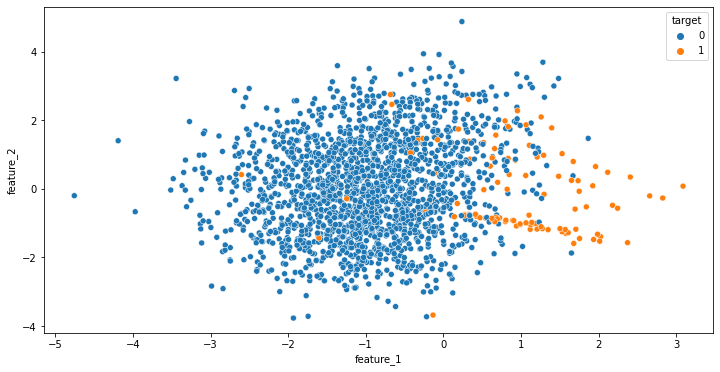

In [4]:
plt.figure(figsize=(12,6))
sns.scatterplot(x=X.loc[:,'feature_1'], y=X.loc[:,'feature_2'], hue=y, palette='tab10' )

# Logistic Regression

In [5]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X, y)

LogisticRegression()

In [6]:
pd.DataFrame(model.coef_,columns=['feature_1','feature_2'])

,feature_1,feature_2
0,2.414484,-0.303078


In [7]:
model.intercept_

array([-2.67299479])

# Accuracy Score

In [8]:
model.score(X, y)

# The best estimate is on a dataset you haven't seen yet.

0.9635

## Hiding some part of the data to check a better estimate of the `.score()`

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify = y)
X_train.head()

,feature_1,feature_2
1531,-2.000788,-0.902438
856,-0.479388,1.050458
238,-2.391900,-0.479639
57,1.424192,2.998661
361,-1.087119,2.920614


In [10]:
model.fit(X_train, y_train)

LogisticRegression()

### Test Score

In [11]:
model.score(X_test, y_test)

0.96

### Train Score

In [12]:
model.score(X_train, y_train)

0.9625

`model.score()` measures what is called the **accuracy of the model**. 

- Accuracy: $\frac{\text{number observations I've correctly predicted}}{\text{total number of observations}}$

But wait a minute. Let me create a dumb classifier.

In [13]:
class DumbClassifier():
    
    def __init__(self):
        pass
    
    def fit(self, X, y):
        self.coef_='Esse modelo não é tão chique assim'
        self.intercept_ = 'Esse modelo não é tão chique assim'
        pass
    
    def predict(self, X):
        return [0 for i in range(len(X))]
    
    def score(self, X, y):
        from sklearn.metrics import accuracy_score
        return accuracy_score(y,self.predict(X))

In [14]:
dumb = DumbClassifier()


In [15]:
dumb.fit(X_train, y_train)

In [16]:
dumb.coef_

'Esse modelo não é tão chique assim'

In [17]:
dumb.score(X_test, y_test)

0.945

Why did that happen?

C:\Users\raian\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


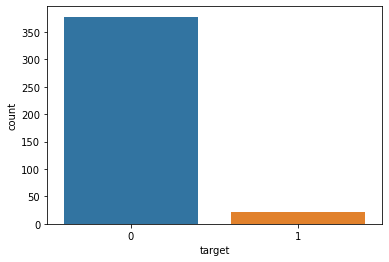

In [18]:
import seaborn as sns

sns.countplot(y_test)

In [19]:
y_test.value_counts()

0    378
1     22
Name: target, dtype: int64

In [20]:
y_test.value_counts(normalize=True)

0    0.945
1    0.055
Name: target, dtype: float64

So how do I know if I'm doing a good job on my model's performance?

# Confusion Matrix

Usually, when dealing with a business problem that you have to predict a label, accuracy won't be your only choice of metric. It will heavily depend on your problem. 

- If, for example, you are dealing with a problem trying to predict **the probability of a person being a fraudster**, you may just guess that every person is not a **fraudster** and you'll have a wonderful performance in terms of **accuracy**. For your problem, however, the most important observations you should have predicted correctly were the ones with the `label = 1` (i.e., the fraudster ones). However, you've missed all of them.

This usually happens when your dataset (specifically, the target of your classification) is heavily imbalanced.

The **CONFUSION MATRIX** is a good way to check how your machine learning performs in this more reliable metrics:

![https://github.com/Rairocha/images/blob/main/confusion_matrix.jpg](confusion_matrix.jpg)

There are 4 quadrants here:
    
<u>First, checking the quadrants where you got your answers correctly:</u>

- $1^\underline{st}$ quadrant: 
    - Row: The real value is 0 
    - Column: The predicted value is 0
    - This is called the **TRUE NEGATIVE** (or **TN**). So I got the results correctly and they were predicted **negative** (or 0) for my problem. 
    
    
- $4^\underline{th}$ quadrant: 
    - Row: The real value is 1  
    - Column: The predicted value was 1
    - Again you got it right. But this time, both your output and the real observation has a value of 1, which is the **positive** value in your target variable. This is why this quadrant represents the **TRUE POSITIVE** (or **TP**)
    
<u>Now, the quadrants where we've missed it!</u> This is important to **check how much your errors are costing** to you.

- $2^\underline{nd}$ quadrant: 
    - Row: The real value is 1 
    - Column: The predicted value is 0
    - This time you've commited a mistake. The real value of the observation was supposed to be 1, but you predicted it to be 0. This is called the **FALSE NEGATIVE** (or **FN**). 
    
    
- $3^\underline{rd}$ quadrant: 
    - Row: The real value is 0
    - Column: The predicted value was 1
    - Again, you've made a mistake. The real value of the observation was supposed to be 0, but you've predicted it to be 1. This is called the **FALSE POSITIVE** (or **FP**).


![https://github.com/Rairocha/images/blob/main/confusion_matrix_errors.png](confusion_matrix.jpg)

In [21]:
from sklearn.metrics import plot_confusion_matrix, confusion_matrix

In [22]:
confusion_matrix(y_test, model.predict(X_test))

array([[373,   5],
       [ 11,  11]], dtype=int64)

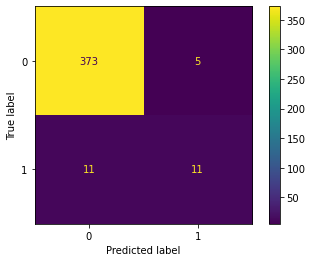

In [23]:
plot_confusion_matrix(model, X_test, y_test, values_format='.0f')
plt.grid(False)

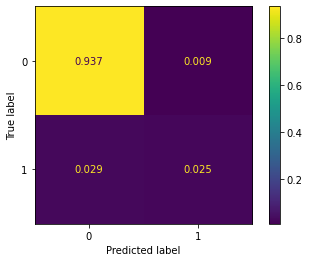

In [24]:
plot_confusion_matrix(model, X, y, values_format='.3f', normalize='all')
plt.grid(False)

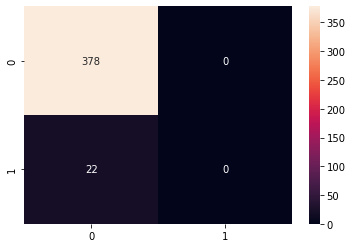

In [25]:
# using the dumb model
sns.heatmap(confusion_matrix( y_test, dumb.predict(X_test) ), annot=True,fmt='g')

In [26]:
confusion_matrix( y_test, dumb.predict(X_test))

array([[378,   0],
       [ 22,   0]], dtype=int64)

In [27]:
confusion_matrix(y_test, model.predict(X_test))

array([[373,   5],
       [ 11,  11]], dtype=int64)

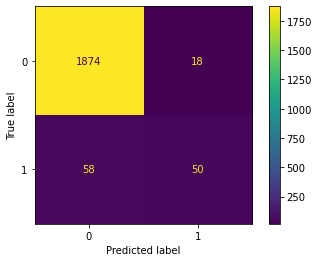

In [28]:
plot_confusion_matrix(model, X, y, values_format='.0f')
plt.grid(False)

# Precision and Recall

The Confusion Matrix helps us obtain two important metrics. The precision and recall score. 

## Accuracy

Accuracy = $\frac{TN + TP}{TN + TP + FN + FP}$

## Precision

In words, the precision tells you:
- From everybody you've predicted to be a fraudster, how many of them were actually a fraudster?


So, for example, in our case:
- I have predicted that 56 people were fraudsters (44 + 12).
- We have correctly predicted 44 (**TRUE POSITIVE**) and misjudged 12 of them (**FALSE POSITIVE**)
- This gives us a precision of $\frac{44}{44+12} = \frac{44}{56} \approx 0.78$
- The formula to calculate the precision is, thus, $\frac{TP}{TP + FP}$

## Recall

In words, the recall tells you:
- From all the fraudsters in your dataset (all `label = 1`), how many have you captured? 

So, for example, in our case:
- We have 108 fraudsters in our dataset (44 + 64).
- We have correctly predicted 44 (**TRUE POSITIVE**) but we've **missed** 64 of them (**FALSE NEGATIVE**). 64 of them were fraudster, but we've failed to capture them.
- This gives us a recall of $\frac{44}{44+64} = \frac{44}{108} \approx 0.41$
- The formula to calculate the recall is, thus, $\frac{TP}{TP + FN}$

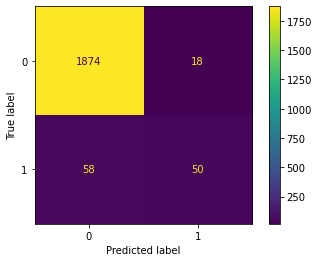

In [29]:
plot_confusion_matrix(model, X, y, values_format='.0f')
plt.grid(False)

In [30]:
# In Python:

from sklearn.metrics import precision_score, recall_score

In [31]:
precision_score(y, model.predict(X))

0.7352941176470589

In [32]:
recall_score(y, model.predict(X))

0.46296296296296297

In [33]:
precision_score(y, dumb.predict(X))

C:\Users\raian\miniconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.0

In [34]:
recall_score(y, dumb.predict(X))

0.0

## Don't use this language in business 

Precision $\to$ Taxa de Conversão, Taxa de acerto
- marketing example: from the 100 customers you've predicted would buy, 80 bought. 80% precision, 80% **conversion rate**.
- fraud example: from the 20 clients you've predicted would make a fraud, 15 have commited a fraud. 75% precision, 75% **hit rate**.


Recall $\to$ Taxa de Captura

- marketing example: from the 120 customers who bought the product, I've captured 80. 66% recall, 66% **capture rate**.
- fraud example: from the 30 fraudsters that have ever existed this month, I've got 15. 50% recall, 50% **capture rate**.

---

## Business Examples:

### FBI entrance

- Imagine you are the FBI and you grant access to people taking a picture of their retina. Your classification problem is: 
    - Is the picture from someone **trusted** (1) or **untrusted** (0).

First, let's think of the cost of errors:
- False Negative: I say the person is <u>not trusted</u> but in fact the person was <u>trusted</u> $\to$ cost: person has to put the eye on camera and try again.
- False Positive: I say the person is <u>trusted</u>, but in fact the person is <u>not trusted</u> $\to$ cost: United States whole secrets are revealed.

Which one cost the most?

If I were to optimize for maximum:
    
- Precision: from all people I've predicted to be trusted, I've managed to get a good deal of them right. I am  minimizing False Positives. Secrets won't be revealed. $\leftarrow$

- Recall: from all trusted people, I've captured most of them. I am minimizing False Negatives. People won't need to put the eye again on camera.

### Challenger launch

- Imagine you are responsible for developing a machine learning model to predict whether to launch or not launch a rocket based on weather.
    - Is it a good (1) or bad (0) day to launch.

Cost of errors:

- False Negative: I say the day is <u>not good</u> but the day was <u>good</u> $\to$ cost: wait for tomorrow
- False Positive: I say the day is <u>good</u> but the day was <u>not good</u> $\to$ cost: challenger explodes

Which one cost the most?

If I were to optimize for maximum:

- Precision: from all days I've predicted to be good, I've managed to get a good deal of them right. I am minimizing False Positives. Rockets won't explode as often. $\leftarrow$

- Recall: from all good days, I've captured most of them. Minimizing False Negatives. I won't delay the launch so much.

### Cancer Diagnosis

- Imagine you are supposed to create a model to test for Cancer. Your classification problem is:
    - Is the patient **with cancer** (1) or **without cancer** (0)
    
Cost of Errors:

- False Negative: I say the person <u>doesn't have cancer</u> and the person <u>has cancer</u> $\to$ cost: person dies
- False Positive: I say the person <u> has cancer </u> and the person <u> doesn't have cancer</u> $\to$ cost: person goes on and take a diagnosis test.

So, in this case, if I were to optimize for maximum:

- Precision: from all people I've predicted to have cancer, I've managed to get a good deal of them right. Less diagnosis tests will be taken.
- Recall: from all people who have cancer, I've captured most of them. Less people will die. $\leftarrow$


This also makes us think: 

Imagine your test has the following pattern: 
- given a sample, 10% of the patients who tested positive will be False Positive.
- also, 10% of the patients who tested negative will be False Negative.

We usually only make diagnosis tests for cases when the test was positive, because we want to prove us wrong, that it was a False Positive. But shouldn't we perform diagnosis tests for False Negatives as well? Even more, I would say, because the cost of that is greater.

# F1-Score

The F1-Score is a metric that calculates the **harmonic mean** of precision and recall.

So what it does, mathematically is basically: 

$$F_1 = \frac{2}{\frac{1}{\text{precision}} + \frac{1}{\text{recall}}}$$

Remember that this tends to bring the mean of the two values closer to the smaller metric. So, in our case, we would have:

In [35]:
from sklearn.metrics import f1_score, fbeta_score

In [36]:
precision_score(y, model.predict(X))

0.7352941176470589

In [37]:
recall_score(y, model.predict(X))

0.46296296296296297

In [38]:
f1_score(y, model.predict(X))

0.5681818181818182

If we've calculated the arithmetic mean, we would have:

In [39]:
np.mean([precision_score(y, model.predict(X)), recall_score(y, model.predict(X))])

0.599128540305011

In practice, if you are in a situation that you need to consider both precision and recall, you would use the F1-Score

Common case: Police.

- You want to make sure that the one you've predicted is a criminal is indeed a criminal
- You also want to make sure you capture as many criminals as possible.

# The Threshold

In [40]:
y

0       1
1       0
2       0
3       0
4       0
       ..
1995    0
1996    0
1997    0
1998    0
1999    0
Name: target, Length: 2000, dtype: int32

In [41]:
model.predict(X)

array([0, 0, 0, ..., 0, 0, 0])

In [42]:
model.predict_proba(X)

array([[5.61543176e-01, 4.38456824e-01],
       [9.90293040e-01, 9.70695988e-03],
       [9.39618408e-01, 6.03815921e-02],
       ...,
       [9.99979663e-01, 2.03369239e-05],
       [9.99153320e-01, 8.46680387e-04],
       [9.88678658e-01, 1.13213416e-02]])

In [43]:
model.predict_proba(X)[:, 1]

array([4.38456824e-01, 9.70695988e-03, 6.03815921e-02, ...,
       2.03369239e-05, 8.46680387e-04, 1.13213416e-02])

In [44]:
model.predict_proba(X)[:, 1] > 0.5

array([False, False, False, ..., False, False, False])

In [45]:
model.predict_proba(X)[model.predict_proba(X)[:, 1] > 0.5, 1]

array([0.67908695, 0.69950049, 0.75552621, 0.99661524, 0.53605971,
       0.66874343, 0.91710895, 0.76700866, 0.60118394, 0.87234102,
       0.70099354, 0.69086477, 0.92666612, 0.66212994, 0.7921019 ,
       0.82678007, 0.9730827 , 0.64478427, 0.88065758, 0.54696966,
       0.61671848, 0.61210649, 0.72078796, 0.86498544, 0.96306566,
       0.89016307, 0.88875735, 0.95816911, 0.56103559, 0.97659459,
       0.56001916, 0.66075058, 0.95455007, 0.9636318 , 0.92183927,
       0.66572035, 0.50505326, 0.57676356, 0.99383421, 0.92346489,
       0.64542632, 0.8872863 , 0.55908029, 0.9161863 , 0.71974779,
       0.56095148, 0.54577681, 0.99005925, 0.50887553, 0.8448021 ,
       0.74899577, 0.91526706, 0.94721823, 0.87441493, 0.98626055,
       0.86622461, 0.62025178, 0.6419538 , 0.7433471 , 0.85178345,
       0.53184076, 0.84372293, 0.59840846, 0.62785814, 0.91012059,
       0.96703935, 0.5722454 , 0.5373957 ])

In [46]:
(model.predict(X) == (model.predict_proba(X)[:, 1] > 0.5)).all()

True

In [47]:
confusion_matrix(y,model.predict_proba(X)[:, 1] > 0.5)

array([[1874,   18],
       [  58,   50]], dtype=int64)

In [48]:
precision_score(y,model.predict_proba(X)[:, 1] > 0.5)

0.7352941176470589

In [49]:
recall_score(y,model.predict_proba(X)[:, 1] > 0.5)

0.46296296296296297

### Moving the threshold: thresh = 0.5

In [50]:
def plot_thresh(thresh=0.5):
    """disclaimer: values are not exact"""
    import matplotlib.pyplot as plt
    slope = - model.coef_[0,0] / model.coef_[0,1]
    intercept = - model.intercept_[0] / model.coef_[0,1]

    intercept += - (thresh-.5) * 35

    fig = plt.figure()
    ax1 = fig.add_subplot(111)

    sns.scatterplot(np.array(X)[:,0], np.array(X)[:,1], hue=y, ax=ax1, palette='tab10')

    x_min, x_max = ax1.get_xlim()
    ax1.plot([x_min, x_max], [x_min*slope+intercept, x_max*slope+intercept], '-r', lw=4)
    ax1.set_xlim([-5,5])
    ax1.set_ylim([-5, 5])
    plt.show()

C:\Users\raian\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


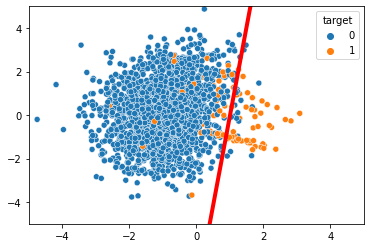

In [51]:
plot_thresh(0.5)

In [52]:
y_predicted = (model.predict_proba(X_test)[:, 1] > 0.5).astype(int)

In [53]:
confusion_matrix(y_test, y_predicted)

array([[373,   5],
       [ 11,  11]], dtype=int64)

## High Precision $\to$ high threshold

In [54]:
y_predicted = (model.predict_proba(X_test)[:, 1] > 0.1)
confusion_matrix(y_test, y_predicted)

array([[338,  40],
       [  7,  15]], dtype=int64)

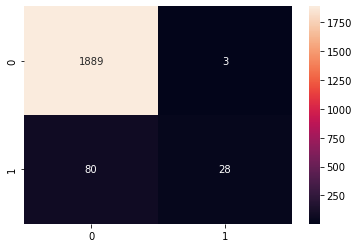

In [59]:
sns.heatmap(confusion_matrix(y, y_pred), annot=True,fmt='g')

In [60]:
y_pred = model.predict_proba(X)[:, 1] > 0.8
y_pred

array([False, False, False, ..., False, False, False])

In [61]:
confusion_matrix(y, y_pred)

array([[1889,    3],
       [  80,   28]], dtype=int64)

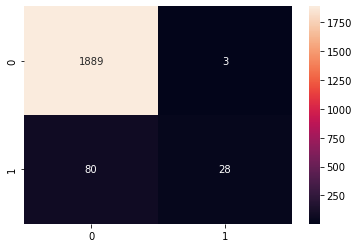

In [62]:
sns.heatmap(confusion_matrix(y, y_pred), annot=True,fmt='g')

C:\Users\raian\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


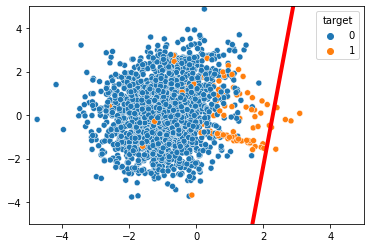

In [63]:
plot_thresh(0.8)

Small recall

In [64]:
precision_score(y, y_pred)

0.9032258064516129

In [65]:
recall_score(y, y_pred)

0.25925925925925924

## High Recall $\to$ small threshold

In [66]:
y_pred = model.predict_proba(X)[:, 1] > 0.2
y_pred

array([ True, False, False, ..., False, False, False])

In [67]:
confusion_matrix(y, y_pred)


array([[1820,   72],
       [  27,   81]], dtype=int64)

In [68]:
print(np.array([[1874,   18],
[  58,   50]]))

[[1874   18]
 [  58   50]]


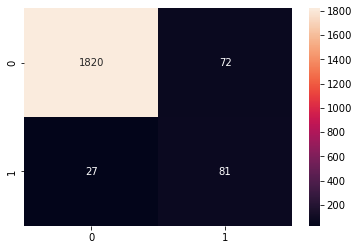

In [69]:
sns.heatmap(confusion_matrix(y, y_pred), annot=True,fmt='g')


C:\Users\raian\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


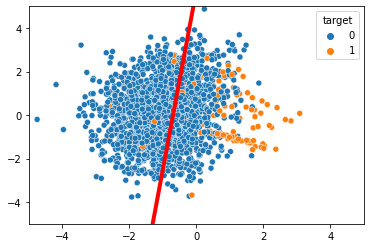

In [70]:
plot_thresh(0.1)

Small precision

In [71]:
precision_score(y, y_pred)

0.5294117647058824

In [72]:
recall_score(y, y_pred)

0.75

# Precision-Recall Curve

In [73]:
from sklearn.metrics import plot_precision_recall_curve

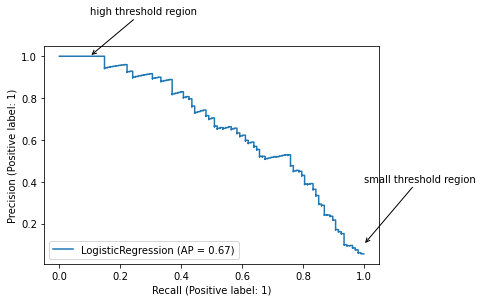

In [74]:
plot_precision_recall_curve(model, X, y)

plt.annotate('small threshold region', 
             xy=(1, .1),
             xytext=(1., 0.4), textcoords='data',
             arrowprops=dict(arrowstyle="->",
                             ), )

plt.annotate('high threshold region', 
             xy=(.1, 1),
             xytext=(.1, 1.2), textcoords='data',
             arrowprops=dict(arrowstyle="->",
                             ) );

Small threshold $\to$ higher recall

Higher threshold $\to$ higher precision

# The ROC Curve

In [75]:
from sklearn.metrics import plot_roc_curve, roc_auc_score, roc_curve

## What if we move the threshold and calculate the rates of True Positives (y-axis) and False Positives (x-axis) ?



True Positive Rate: $\frac{TP}{TP + FN}$ = sensitivity = $\frac{11}{16+11} = 0.4$

False Positive Rate : $\frac{FP}{FP + TN}$ =  1 - specificity = $\frac{0}{0 + 11} = 0$ 

## Plotting the roc curve

In [76]:
def safe_div(a, b):
    return a/b if b !=0 else 0

In [77]:
from ipywidgets import interact

In [78]:
def get_roc_stats(thresh):
    fig, ax = plt.subplots(1, 1)
    plt.grid(True)
    y_prob = model.predict_proba(X_test)[:, 1]
    y_predicted = y_prob > thresh
    
    m = confusion_matrix(y_test, y_predicted)
    
    tpr = safe_div(m[1,1], (m[1,1] + m[1,0]))
    fpr = safe_div(m[0,1], (m[0,1] + m[0,0]))
    
    ax.scatter(fpr, tpr, c='red')
    ax.plot(np.arange(0,1.1,0.1), np.arange(0,1.1,0.1), c='red')
    ax.set_xlim([0, 1])
    ax.set_ylim([0, 1])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    
    return tpr, fpr

In [79]:
from ipywidgets import widgets

In [80]:
order = 1e-2
slider = widgets.FloatSlider(min=-0.05, max =1.05, step= 0.05*order, value = 2.*order)

interact(get_roc_stats, thresh=slider)


interactive(children=(FloatSlider(value=0.02, description='thresh', max=1.05, min=-0.05, step=0.0005), Output(…

<function __main__.get_roc_stats(thresh)>

In [81]:
y_predicted = (model.predict_proba(X_test)[:, 1] > 0.9)
confusion_matrix(y_test, y_predicted)

array([[378,   0],
       [ 19,   3]], dtype=int64)

In [82]:
from sklearn.metrics import plot_roc_curve

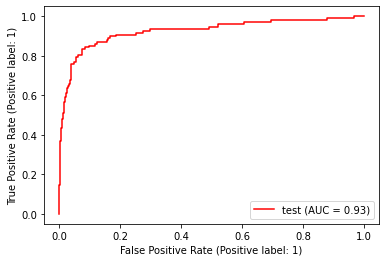

In [83]:
fig, ax = plt.subplots()
plot_roc_curve(model, X, y, color='red', ax= ax, name='test')

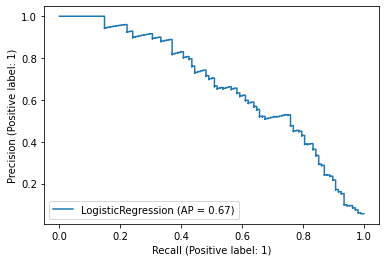

In [84]:
plot_precision_recall_curve(model, X, y)

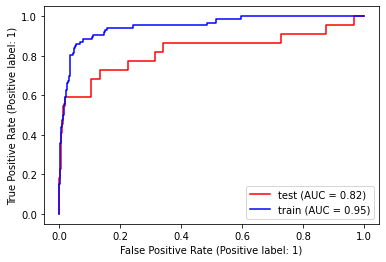

In [85]:
fig, ax = plt.subplots()

plot_roc_curve(model, X_test, y_test, color='red', ax= ax, name='test')
plot_roc_curve(model, X_train, y_train, color='blue', ax=ax, name='train')


In [86]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])

0.8241943241943241

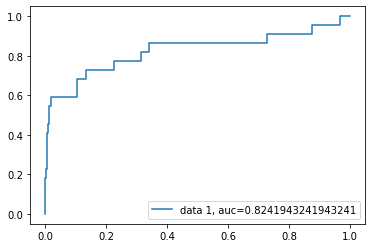

In [89]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

$$ Gini = 2 \times AUC - 1 $$

In [90]:
fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
[print(f'Para treshold {i[2]} recall {i[1]} e False positive rate {i[0]}') for i in zip(fpr,tpr,_)];

Para treshold 1.9765945912223266 recall 0.0 e False positive rate 0.0
Para treshold 0.9765945912223266 recall 0.045454545454545456 e False positive rate 0.0
Para treshold 0.8901630716405569 recall 0.18181818181818182 e False positive rate 0.0
Para treshold 0.8662246144984094 recall 0.18181818181818182 e False positive rate 0.0026455026455026454
Para treshold 0.8649854410048027 recall 0.22727272727272727 e False positive rate 0.0026455026455026454
Para treshold 0.8448021002607013 recall 0.22727272727272727 e False positive rate 0.005291005291005291
Para treshold 0.6657203543442636 recall 0.4090909090909091 e False positive rate 0.005291005291005291
Para treshold 0.66075058068699 recall 0.4090909090909091 e False positive rate 0.007936507936507936
Para treshold 0.5767635564373983 recall 0.45454545454545453 e False positive rate 0.007936507936507936
Para treshold 0.5469696566365003 recall 0.45454545454545453 e False positive rate 0.013227513227513227
Para treshold 0.49900577858008954 reca

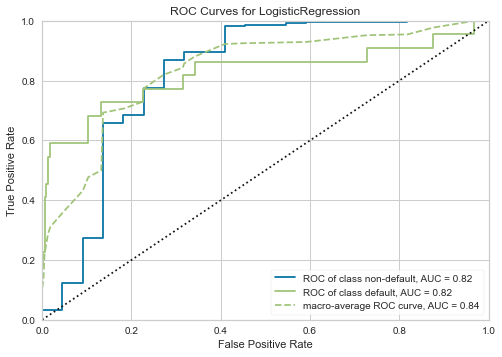

In [91]:
from sklearn.linear_model import LogisticRegression

from yellowbrick.classifier import ROCAUC

# Instantiate the visualizer with the classification model
model = LogisticRegression()
visualizer = ROCAUC(model, classes=["non-default", "default"], micro=False, per_class=True)

visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show()      # Finalize and show the figure